# Data Processing

In [1]:
import pandas as pd
import numpy as np


In [2]:
file = 'chainlink.txt'


In [3]:
# read data
data = pd.read_csv(file, header = None)
# data
data = pd.DataFrame(data)
data


,0,1,2,3
0,-0.452525,-0.890705,0.023005,1
1,0.652850,-0.845875,0.021084,1
2,0.397904,0.913450,-0.001391,1
3,0.095233,1.054986,0.006280,1
4,0.523990,-0.941104,0.037762,1
5,-0.026295,1.004394,0.021792,1
6,0.424546,0.908192,-0.028532,1
7,-0.991431,-0.274878,0.051088,1
8,-1.012615,-0.035256,0.037980,1
9,-0.730493,-0.630984,-0.031217,1


In [4]:
print(len(data[data[3]==1]), len(data[data[3]==2]))
separate = len(data[data[3]==1])
               

500 500


In [5]:
# feature used in clustering
feature_data = np.array(data[[0,1,2]])
feature_data.shape


(1000, 3)

In [6]:
# labels 
label = np.array(data[3])

# ISOMAP

In [7]:
## ISOMAP
import sklearn as learn
from sklearn.manifold import Isomap


In [8]:
# parameters
my_neighbors = 20
my_components = 2


In [9]:
# model
embedding = Isomap(n_neighbors = my_neighbors, n_components = my_components)

# data
X = feature_data

# fitting
X_transformed = embedding.fit_transform(X)

In [10]:
# print
X_transformed.transpose()


array([[-0.85826479, -0.73584407,  0.96696399, ..., -0.37779194,
         0.23255648,  0.60754022],
       [-0.82720208, -0.71864798,  0.98747045, ...,  0.41404575,
        -0.21830823, -0.57247554]])

# Visualization for ISOMAP

In [11]:
import matplotlib
import matplotlib.pyplot as plt


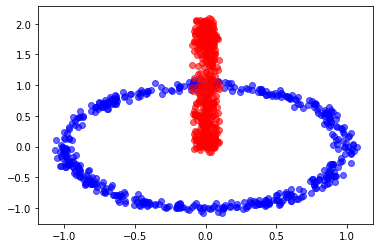

In [12]:
# before ISOMAP
plt.scatter(X[:separate].transpose()[0],X[:separate].transpose()[1], c='b', alpha=0.6)  
plt.scatter(X[separate:].transpose()[0],X[separate:].transpose()[1], c='r', alpha=0.6)  
plt.show()


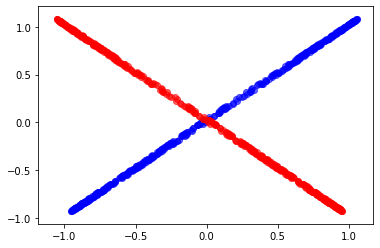

In [13]:
# after ISOMAP
plt.scatter(X_transformed[:separate].transpose()[0],X_transformed[:separate].transpose()[1], c='b', alpha=0.6)  
plt.scatter(X_transformed[separate:].transpose()[0],X_transformed[separate:].transpose()[1], c='r',alpha=0.6)  
plt.show()


# SOM

In [14]:
## SOM
from minisom import MiniSom


In [15]:
# parameters
grid = (12, 12)
data_dim = 3
my_sigma = 6
my_lr = 0.9

iter = 5000


In [16]:
# data
X = feature_data

In [17]:
# model
som = MiniSom(grid[0], grid[1], data_dim, sigma=my_sigma, learning_rate=my_lr,  random_seed=10)

# training
print("Training...")
som.train_batch(X, iter, verbose=True)  # random training
print("\n...ready!")

Training...


 [  805 / 5000 ]  16% - 2004.54691 it/s

 [ 1205 / 5000 ]  24% - 1999.40910 it/s

 [ 1620 / 5000 ]  32% - 2015.17362 it/s

 [ 2010 / 5000 ]  40% - 1995.29658 it/s

 [ 2431 / 5000 ]  49% - 2008.41730 it/s

 [ 2827 / 5000 ]  57% - 2000.51651 it/s

 [ 3237 / 5000 ]  65% - 2004.22754 it/s

 [ 3659 / 5000 ]  73% - 2014.09811 it/s

 [ 4051 / 5000 ]  81% - 2008.07710 it/s

 [ 4468 / 5000 ]  89% - 2012.62728 it/s

 [ 4868 / 5000 ]  97% - 2010.59739 it/s

 [ 5000 / 5000 ] 100% - 2009.11595 it/s - quantization error: 0.2593662973049248

...ready!


# Visualization for SOM

In [18]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

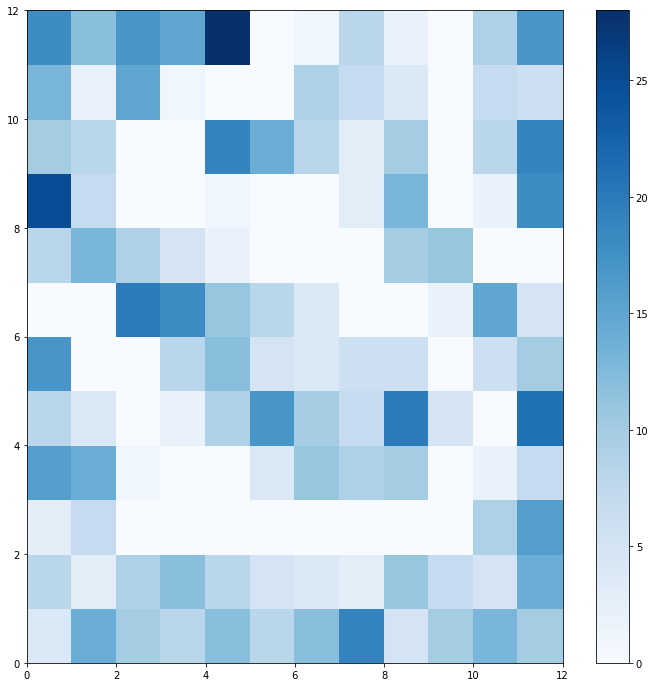

In [19]:
plt.figure(figsize=(grid[0], grid[1]))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

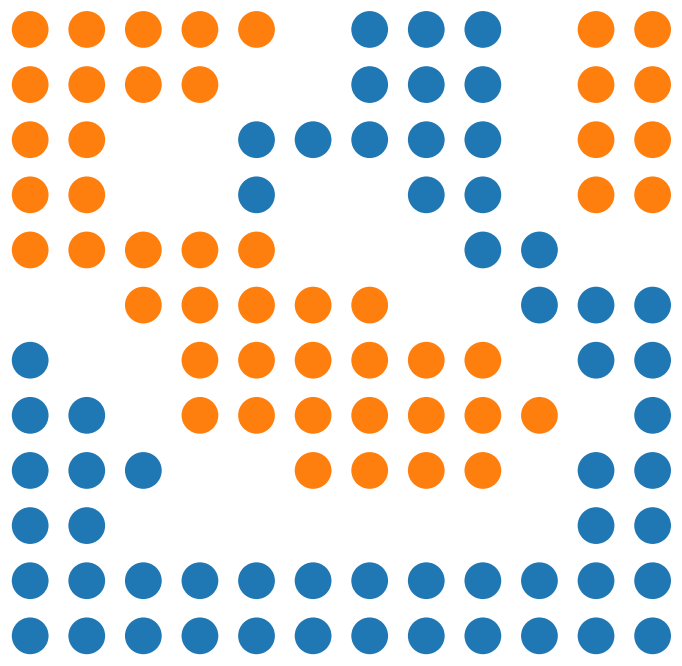

In [20]:

labels_map = som.labels_map(X, label)
label_names = np.unique(label)

plt.figure(figsize=(grid[0], grid[1]))
the_grid = GridSpec(grid[0], grid[1])
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[grid[0]-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
    
plt.show()